In [22]:
import json
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [93]:
EXPT_NAME_VAE = 'expt_003'
EXPT_NAME_CVAE = 'expt_004'
EXPT_NAME_ClassVAE = 'expt_006'

DATA_ROOT = '/var/data/processed'
EXPT_DIR_VAE = os.path.join(DATA_ROOT, EXPT_NAME_VAE, 'data')
EXPT_DIR_CVAE = os.path.join(DATA_ROOT, EXPT_NAME_CVAE, 'data')
EXPT_DIR_ClassVAE = os.path.join(DATA_ROOT, EXPT_NAME_ClassVAE, 'data')


GOLDEN_EMBEDDINGS_DIR_VAE = os.path.join(EXPT_DIR_VAE, 'golden_embeddings')
GOLDEN_EMBEDDINGS_DIR_CVAE = os.path.join(EXPT_DIR_CVAE, 'golden_embeddings')
GOLDEN_EMBEDDINGS_DIR_ClassVAE = os.path.join(EXPT_DIR_ClassVAE, 'golden_embeddings')

RANDOM_SEED = 4
GOLDEN_SIZE = 100
SAMPLE_SIZE = 100000

In [94]:
#get the data from json files
def get_data(directory, subset):
    json_files = [pos_json for pos_json in os.listdir(directory) if pos_json.endswith(subset +'.json')]

    documents = []
    for file in json_files:
        path = os.path.join(directory, file)
        with open(path, 'r') as file:
            doc = json.load(file)
        documents.append(doc)
    return documents

In [95]:
docs_VAE_src = get_data(GOLDEN_EMBEDDINGS_DIR_VAE, 'src')
docs_CVAE_src = get_data(GOLDEN_EMBEDDINGS_DIR_CVAE,'src')
docs_ClassVAE_src = get_data(GOLDEN_EMBEDDINGS_DIR_ClassVAE,'src')
docs_VAE_dr = get_data(GOLDEN_EMBEDDINGS_DIR_VAE, 'dr')
docs_CVAE_dr = get_data(GOLDEN_EMBEDDINGS_DIR_CVAE,'dr')
docs_ClassVAE_dr = get_data(GOLDEN_EMBEDDINGS_DIR_ClassVAE,'dr')


In [96]:
#sample 3 datapoints from the dataset
np.random.seed(RANDOM_SEED)
sample_data = np.random.choice(GOLDEN_SIZE, [SAMPLE_SIZE,3])

In [97]:
from scipy.spatial import distance

#calculate the l2 norm distance
def norml2(lst1, lst2):
    return distance.euclidean(lst1,lst2)

In [98]:
#calculate jaccard distance of to vectors
#dist([0, 1, 1, 0, 0], [0, 1, 0, 0, 1]) = 1/3
def onehot_sim(lst1, lst2):

    intersection = 0
    union = 0
    
    for i,_ in enumerate(lst1):
        if(lst1[i] == 1 and lst2[i] == 1):
            intersection += 1
        if(lst1[i] == 1 or lst2[i] == 1):
            union += 1
    if(union == 0):
        return 0
    
    return intersection/union
    
    
    

In [99]:
#if the order distance between embeddings of two lists matches their label similaritiy, score 1 for this triple sample
def cal_score(sample_data, documents):
    #TODO : what is similarity function for onehots
    sample_score = []
    score = 0
    good_samples = []
    for sample in sample_data:
        
        d1 = norml2(documents[sample[0]]['mu'], documents[sample[1]]['mu'])
        d2 = norml2(documents[sample[1]]['mu'], documents[sample[2]]['mu'])
        sim1 = onehot_sim(documents[sample[0]]['labels'], documents[sample[1]]['labels'])
        sim2 = onehot_sim(documents[sample[1]]['labels'], documents[sample[2]]['labels'])
        
    
        if((d1>d2 and sim2>sim1) or (d2>d1 and sim1>sim2)):
            sample_score.append(1)
            good_samples.append(sample)
            score += 1
        else:
            sample_score.append(0)
            
    return score/SAMPLE_SIZE, sample_score

In [100]:
score_ClassVAE_src, sample_score_ClassVAE_src = cal_score(sample_data, docs_ClassVAE_src)
score_VAE_src, sample_score_VAE_src = cal_score(sample_data, docs_VAE_src)
score_CVAE_src, sample_score_CVAE_src = cal_score(sample_data, docs_CVAE_src)

score_VAE_dr, sample_score_VAE_dr = cal_score(sample_data, docs_VAE_dr)
score_CVAE_dr, sample_score_CVAE_dr = cal_score(sample_data, docs_CVAE_dr)
score_ClassVAE_dr, sample_score_ClassVAE_dr = cal_score(sample_data, docs_ClassVAE_dr)


print("VAE_SRC score:{}".format(score_VAE_src))
print("CVAE_SRC score:{}".format(score_CVAE_src))
print("ClassVAE_SRC score:{}".format(score_ClassVAE_src))
print("VAE_dr score:{}".format(score_VAE_dr))
print("CVAE_dr score:{}".format(score_CVAE_dr))
print("ClassVAE_dr score:{}".format(score_ClassVAE_dr))



VAE_SRC score:0.19167
CVAE_SRC score:0.19483
ClassVAE_SRC score:0.19483
VAE_dr score:0.23775
CVAE_dr score:0.22748
ClassVAE_dr score:0.2438


In [114]:
#show good samples
for i,x in enumerate(sample_score_VAE_src):
    if(x == 1):
        print(sample_data[i])
    

[32 75 57]
[43 33 73]
[85 90 34]
[64 98 46]
[26  8 78]
[ 5 27 27]
[ 0 26 61]
[11 38  1]
[ 6 15 89]
[23 74 71]
[40 99 32]
[ 7  6 66]
[47 38 92]
[54 89 89]
[61 22  8]
[68 75 15]
[ 7 92 25]
[ 6 67 57]
[98 35 81]
[13 94  4]
[ 8 49 26]
[ 0 53  2]
[89  7 57]
[68 46 24]
[64 17 95]
[85 58 26]
[48 76 32]
[36 73 73]
[97 51 37]
[ 9 55 16]
[22 54 79]
[7 3 3]
[95 66 26]
[89 45 33]
[25 35  0]
[ 7 98 51]
[27 86 77]
[27 73 38]
[40  5 51]
[23 94  5]
[43  4 69]
[35 28 37]
[53 54 39]
[91 93 37]
[84 18 18]
[93  8 97]
[84 41 99]
[40 37 33]
[72 25 65]
[ 7 94 20]
[59 44 97]
[39 89 54]
[ 9 29 24]
[42 69 38]
[19 60 34]
[41  8 78]
[39 24  4]
[52 41 99]
[62 26 37]
[59  6  4]
[12 45 26]
[59 63 87]
[13 63 46]
[28 75 35]
[57 86 25]
[83  5 18]
[19 45 14]
[44 88 32]
[85 50 87]
[89 45 14]
[40 75  7]
[79  3  5]
[27 73 34]
[62 78 96]
[97 99 65]
[ 1 36 68]
[56 38 94]
[83 22 44]
[75 90 71]
[30 79 13]
[97  3 18]
[97 32 20]
[17 66 41]
[29 54 15]
[13 35 96]
[64 74 66]
[54  5 34]
[48 41 37]
[79  6 51]
[86 82  8]
[27 61  6]
[1

[64 34 34]
[27  5 60]
[92 68 43]
[62 32 49]
[54 45 30]
[72 74 37]
[85 93  6]
[81 20  4]
[36 82 44]
[79 24 26]
[80 99 21]
[ 0 63 73]
[79 65 24]
[83 29 58]
[89 86 63]
[59 53 71]
[ 0 84 17]
[ 5 89 79]
[93 82 81]
[83  5 87]
[23 45  1]
[61 12 82]
[84 28 25]
[46 89 31]
[42  3 76]
[36  1 70]
[23 81 83]
[85 74 10]
[63 96  7]
[38 75 57]
[15 73 46]
[97 53 94]
[46 89 59]
[96 41 99]
[74 96 78]
[62 30 24]
[ 9 93  6]
[72 25 87]
[ 8 73 66]
[94 40 40]
[48 98  3]
[59 69 61]
[ 9 42 42]
[66 22 97]
[81 96 96]
[12 20 94]
[76 97 57]
[61 12 57]
[ 7 92 88]
[48 45 26]
[57  3 29]
[96 99 53]
[13 45 18]
[64  1 69]
[44 34 76]
[ 0 28 50]
[67 46 74]
[87 15 13]
[ 9 77 93]
[17 87 90]
[ 8 26 70]
[73  8 22]
[ 8 92 90]
[ 9  5 30]
[45 43 56]
[27 98 66]
[44 86 33]
[38  0 96]
[ 0 33 92]
[80 48 54]
[15 57 40]
[85 73 30]
[69 95 95]
[12 38 63]
[83 92 94]
[45 57 96]
[79 98 86]
[52 66 46]
[97 24 34]
[ 7 98 92]
[57 64 59]
[49 35 44]
[39 12  8]
[91 66 61]
[81 49 99]
[25 15 13]
[75 41 38]
[83  4 76]
[71  8 78]
[82 46 45]
[ 8  6 29]

[48 90 61]
[59 24  6]
[42 93 77]
[ 8 37 88]
[87 39 84]
[42 10  1]
[23 65 20]
[19 33 50]
[35 25 86]
[91 70 33]
[89 46 26]
[97 10 86]
[27 30 14]
[37 11 91]
[95 50 90]
[36 99 37]
[27  3 14]
[42 93 34]
[12 46  5]
[ 8 99 49]
[40  3  1]
[12  6 38]
[13 92  4]
[72 90 18]
[59 70 30]
[86 12 44]
[68 65 61]
[83 87 73]
[19 14 76]
[59 34  6]
[17 40 16]
[77 84 84]
[ 0 89 15]
[ 8 77 99]
[80 96 22]
[47 28 41]
[75 66 45]
[82 90 94]
[57 29 18]
[79 93 93]
[23 58 20]
[70 68 31]
[89 26 38]
[99 75 57]
[85 26 98]
[12 92  5]
[72 86 94]
[75 58 58]
[43 94 37]
[53 55 55]
[73 16 40]
[81 10 77]
[43  3 76]
[27 90 51]
[98 96  7]
[97 68 36]
[61 75 57]
[37 67 16]
[80 75 68]
[44 88  4]
[97 18  5]
[85 49 53]
[97 26 65]
[42 33 92]
[39 32 32]
[43 38 93]
[99 22  7]
[19  2  2]
[80  5 10]
[43 65 14]
[26 68 68]
[31 94 60]
[75  8 12]
[52 14 71]
[83 60 21]
[ 7 98 74]
[72 61 28]
[42 66 61]
[12 63 46]
[68  1 37]
[19 28 34]
[81 60 30]
[27 98 93]
[84 98 86]
[63 78 22]
[83 51  6]
[98 83 75]
[11 38 28]
[57 66 70]
[69 57  8]
[55 65 37]

[83 14 14]
[62 25 66]
[46 27 27]
[64 37 61]
[85 68 68]
[49 44 97]
[96 45  6]
[67 21 32]
[16 75 54]
[12  6 98]
[47 92 25]
[30 55 55]
[ 8 88 14]
[45 35 75]
[80  3 30]
[39 63 87]
[52 55 16]
[45 13 36]
[ 4 15 79]
[56 93 93]
[96 94 94]
[83 90 92]
[33  7 57]
[97 13 68]
[96 77 41]
[22 32 61]
[ 8 92 74]
[67 45 87]
[24 15 64]
[27 36 89]
[68 38 61]
[60 22 12]
[ 9 98 30]
[44 49 34]
[84 44 97]
[77 13 79]
[74 82 12]
[40  4 74]
[ 7 12 22]
[68 41 41]
[ 3 75 79]
[68 30 18]
[56 37 74]
[43 92 93]
[60 64 42]
[67 69 74]
[98 36 75]
[59 49 21]
[60 42 54]
[26 13 15]
[98 75 59]
[53 83 78]
[50  7 82]
[47  3 18]
[45  9 23]
[40 14 25]
[80 53 51]
[38 54 56]
[75 49  2]
[96  1 45]
[ 4 44 44]
[12 61 37]
[56 32 32]
[84 11 91]
[47 26 58]
[64  6 33]
[72  9 54]
[47 69 37]
[ 0 25 73]
[59  2 51]
[54 97 44]
[12 94 65]
[11 28 28]
[11 15 59]
[ 0 66 51]
[13 24 93]
[19 71 49]
[43 14 65]
[69 55 16]
[55 46  1]
[62 76 92]
[62 50 69]
[42 63 34]
[85 74 34]
[41  7 57]
[ 2 85 85]
[84 93 26]
[22 38 37]
[56 46 50]
[62 46  1]
[ 1 36 36]

[ 9 45 65]
[14 17 17]
[57 38 87]
[39 70 26]
[77 75 78]
[68 14 33]
[35  1 46]
[29 75 82]
[46  8 35]
[ 0 45 41]
[40 66 26]
[ 8  5 29]
[71 56 59]
[83 40 68]
[80 60 24]
[62 35 44]
[20 82 75]
[61 57 57]
[85 67 23]
[29 42 64]
[40 31 64]
[ 9 59 54]
[23  4 88]
[64 34 99]
[ 0  1 73]
[65 42 54]
[83 92 30]
[48 36 17]
[17 26 90]
[13 65 69]
[98 64 89]
[85 37 90]
[36 33 28]
[56  5  3]
[97  4 93]
[40 74 30]
[83 38 58]
[17 21 51]
[27 45 18]
[15 28 18]
[23 65 33]
[79  1 41]
[84 77  6]
[41 31 15]
[ 0 28 99]
[83 49 99]
[63 79 89]
[34 19 19]
[76 97 12]
[85 26 94]
[39 69 58]
[86 39 84]
[65 42 81]
[37 15 54]
[84 13 68]
[44 14  1]
[62 78  8]
[27 76  3]
[16  7 44]
[72 25 58]
[55 45 87]
[62 54 39]
[80 88 87]
[ 0  1 53]
[58 16 16]
[64  4 69]
[72 20 86]
[97 92 87]
[79 73 92]
[77  8 97]
[54 92  5]
[72 77 87]
[12  6 25]
[62  6 69]
[40 95 17]
[ 7 70 69]
[ 7 63 98]
[11 14 65]
[69 44 97]
[39 92 74]
[80 31 68]
[40 18 18]
[19 14 18]
[ 9 30 18]
[68 41 51]
[57 75 75]
[45 85 36]
[31 60 24]
[89  5 10]
[95 66 26]
[89 65 61]

[56 63 99]
[72 98  4]
[78 93 69]
[42 98 41]
[91 45 94]
[75 30 90]
[48 71 10]
[11 60 61]
[66  7 35]
[ 0 33 28]
[44 51 29]
[27 63 87]
[99 68 31]
[81 99  6]
[82 63 86]
[92 13 64]
[49 82 35]
[11  2 88]
[57 41 10]
[49 16 57]
[98 23 17]
[56 21 60]
[86  7  0]
[23 68 68]
[36 94 94]
[13 70 73]
[27 10 37]
[48 53  6]
[17 32 61]
[ 7 90  1]
[15 94 70]
[44  4  4]
[ 9 74 29]
[55 41 86]
[84 77  5]
[57 61 87]
[ 9 45 26]
[96 70 92]
[85 73 50]
[28 56 82]
[68 98 61]
[85 73 69]
[85  4 65]
[68 40 57]
[68 55 55]
[31 60 34]
[42 38 33]
[28 42 59]
[ 8 37 94]
[19 73 63]
[83 75 89]
[ 4 91 91]
[ 8 38 93]
[ 9 77 73]
[ 0 87 71]
[17 92 87]
[ 7 98 98]
[42 99 37]
[47 77 20]
[72 69 70]
[ 0 93 21]
[85 38 69]
[92 79 75]
[47  5 71]
[87 75 59]
[81  3 76]
[ 8 86 86]
[19 26 26]
[83  6 38]
[42 87 69]
[57 73 51]
[55 53 21]
[ 5 64 64]
[79  1 28]
[12 74 20]
[31 46  5]
[54  1 63]
[54 94 77]
[80 51 20]
[56 15 36]
[ 7 77 46]
[40 41  6]
[80 97 97]
[52 77 99]
[75 96 96]
[27  4 71]
[ 9 68 79]
[27 94 99]
[12 81 81]
[12 10  4]
[85 28 93]

[52 66 99]
[64 65 14]
[84 88  2]
[48 15 64]
[36 32 14]
[44 90 34]
[49 54  9]
[90 57 82]
[35 28 86]
[67 45 94]
[52 33 74]
[54 20 65]
[67 66  1]
[42 63 45]
[39 90  4]
[80 51 20]
[86 81 57]
[35 93  5]
[41 79 42]
[81 52 39]
[43 74 73]
[87 84 17]
[ 8 71 20]
[70 15 31]
[95 49 34]
[12 28  1]
[78 98  3]
[54  3 99]
[15 61 94]
[93 54 89]
[39 46 92]
[53 82 35]
[18 22 78]
[46 16 16]
[ 5 40 48]
[48  4 65]
[89 26 71]
[89 26 38]
[ 0 86 90]
[52 73 58]
[27 29 90]
[75 63 77]
[36 82 78]
[54 86  4]
[ 9 57  8]
[89 99 34]
[27 63 77]
[56 41 61]
[64 45  5]
[81 33  1]
[10 54 89]
[82 55 95]
[68 10 28]
[ 2 17 17]
[59 77 93]
[57 69 61]
[64 25 38]
[28 85 85]
[ 6 82 97]
[13 34 76]
[42 58 94]
[94  8 12]
[23 34 61]
[84 56 79]
[80 61  1]
[42 10 34]
[84 73 90]
[68 86 38]
[15 98 25]
[85 66 93]
[95 49 37]
[98 42 54]
[56 26 90]
[71 54 40]
[81 76 18]
[ 3  0 96]
[22 79 64]
[ 0 77  1]
[17 37 10]
[45 56 57]
[13  1 77]
[52 99 26]
[91 89 54]
[14 81 96]
[ 8 73  3]
[34 54 54]
[54  9  9]
[79 82 12]
[81 57 22]
[70 39  9]
[31 58 25]

[68 86 60]
[59 17 36]
[91 38 98]
[84 74 46]
[68 37  6]
[95 77 58]
[24 31 56]
[22 86 66]
[27 63 94]
[89 41 33]
[49 78  0]
[65 80 80]
[ 0 60  3]
[68 24 77]
[22  2  3]
[23 61 34]
[42 37 10]
[62 65 25]
[68 14 50]
[84 44 82]
[55 42 15]
[79  3  3]
[68 73 46]
[41 78 78]
[19 18  5]
[47 88 21]
[75 12 82]
[98 44 97]
[96 46 92]
[27 28 61]
[53 35 81]
[15 86 98]
[45 42 83]
[72 45  5]
[87 82 96]
[39 10 71]
[87 64 15]
[40 98 58]
[35 10 94]
[91 20 21]
[13 29 51]
[95 28 18]
[ 8  3 66]
[57  6 90]
[40 73 98]
[42 69 92]
[84 58 92]
[50 48 40]
[35 50 53]
[31 65 71]
[61 85 17]
[55 14 53]
[68 26 71]
[83 21 90]
[89  2 49]
[83 60 61]
[ 3 67 23]
[ 8 71 90]
[16 86  5]
[78 97 35]
[88 39 54]
[67 77  3]
[ 0 28 30]
[72 58 65]
[13 51 25]
[27 63 74]
[ 2 54 54]
[81 37 58]
[ 0 61 18]
[45 78 82]
[ 7  3 94]
[39 70 28]
[52 25  1]
[68 75 22]
[67 56 35]
[26 17  9]
[ 7  1 25]
[69 12 96]
[48 86  5]
[29 12  8]
[40 49 69]
[88  7 78]
[31 49 49]
[79 94 38]
[ 2 97 57]
[60 56 75]
[ 8 34 51]
[ 9 92 26]
[43 35 56]
[80 94 41]
[23 86 98]

(array([3.409e+03, 0.000e+00, 1.100e+01, 3.600e+01, 5.100e+01, 3.000e+00,
        0.000e+00, 9.100e+01, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.346e+03]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
 <a list of 14 Patch objects>)

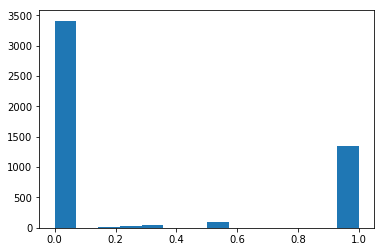

In [27]:


perms = list(itertools.combinations(range(0,100), 2))
sims = []

for perm in perms:
    
    lst0 = docs_VAE_src[perm[0]]['labels']
    lst1 = docs_VAE_src[perm[1]]['labels']
    sim = onehot_sim(lst0, lst1)
    
    sims.append(sim)
    
plt.hist(sims, bins='auto')

(array([2.3231e+04, 8.5000e+01, 2.5060e+03, 2.8960e+03, 1.5600e+02,
        1.0345e+05, 1.9840e+03, 2.9670e+03, 9.6000e+01, 2.4329e+04]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

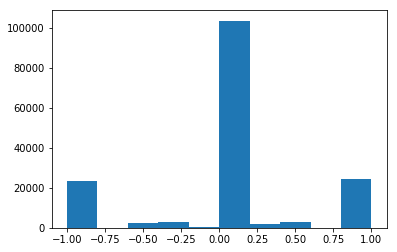

In [7]:
perms = list(itertools.combinations(range(0,100), 3))
results = []

for perm in perms:
    
    lst0 = docs_VAE_src[perm[0]]['labels']
    lst1 = docs_VAE_src[perm[1]]['labels']
    lst2 = docs_VAE_src[perm[2]]['labels']
    
    sim0 = onehot_sim(lst0, lst1)
    sim1 = onehot_sim(lst0, lst2)
    
    results.append(sim1-sim0)
    

plt.hist(results)

In [9]:
perms = list(itertools.combinations(range(0,10), 3))
print(perms)

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 2, 8), (0, 2, 9), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 3, 9), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 4, 8), (0, 4, 9), (0, 5, 6), (0, 5, 7), (0, 5, 8), (0, 5, 9), (0, 6, 7), (0, 6, 8), (0, 6, 9), (0, 7, 8), (0, 7, 9), (0, 8, 9), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 2, 8), (1, 2, 9), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 3, 8), (1, 3, 9), (1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 4, 8), (1, 4, 9), (1, 5, 6), (1, 5, 7), (1, 5, 8), (1, 5, 9), (1, 6, 7), (1, 6, 8), (1, 6, 9), (1, 7, 8), (1, 7, 9), (1, 8, 9), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 3, 7), (2, 3, 8), (2, 3, 9), (2, 4, 5), (2, 4, 6), (2, 4, 7), (2, 4, 8), (2, 4, 9), (2, 5, 6), (2, 5, 7), (2, 5, 8), (2, 5, 9), (2, 6, 7), (2, 6, 8), (2, 6, 9), (2, 7, 8), (2, 7, 9), (2, 8, 9), (3, 4, 5), (3, 4, 6), (3, 4, 7), (3, 4, 8), (3, 4, 9), (3, 5, 6)